# **20230519**

# [04] 분류

## 01 분류의 개요

### 분류(Classification)

: 지도학습 ~ 명시적인 정답이 있는 데이터가 주어진 상태에서 학습하는 머신러닝 방식

## 02 결정트리(Decision Tree) = 균형 이진 트리

: 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리(Tree) 기반의 (이진)분류 규칙을 만듬

- 유연함 = 전처리를 덜해도 됨
- 학습된 모델을 이해하기 쉬움
- 과적합될 가능성이 높음 -> 앙상블에서 사용하기 좋음


#### 노드 (루트, 규칙, 리프)

- 리프노드 : 더 이상 조건을 줄 수 없는 노드, 결정된 클래스값

- 결정(규칙)노드는 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만든다.

<br>

- 정보의 균일도를 측정하는 대표적인 방법은 엔트로피를 이용한 정보 이득 지수와 **지니계수**가 있다.<br> => 분할 조건 찾는 방식

- 지니계수(gini) : 불평등 지수(0(평등)~1(불평등))

- 지니계수가 작다 => 데이터 균일도가 높다 => 데이터 불순도가 작다

- 트리의 깊이가 깊어질 수록 불순도가 작아져야함, 루트에서는 높은 불순도의 질문

### O 결정 트리 모델의 특징

결정트리의 가장 큰 장점은 정보의 균일도라는 룰을 기반으로해 알고리즘이 쉽고 직관적

+) New Data

--- 

# **20230522**

### O 결정 트리 파라미터 

사이킷런은 결정 트리 알고리즘을 구현한 DecisionTreeClassifier 와 DecisionTreeRegressor 클래스를 제공한다.

사이킷런의 결정 트리 구현은 CART(Classification And Regression Trees)알고리즘 기반

|파라미터 명|역할|
|:---------:|:---|
|**min_samples_split** <br> (최소 데이터개수 분리)|- 노드를 분할하기 위한 최소한의 샘플 데이터 수(과적합 제어)<br> - **default=2**, 작게 설정할 수록 분할되는 노드가 많아져 과적합 가능성 증가 |
|**min_samples_leaf**|- 말단 노드(Leaf)가 되기 위한 최소한의 샘플 데이터 수 <br> - 과적합 제어 용도, **비대칭적 데이터**의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 이 경우는 작게 설정 필요|
|**max_features**| - 최대 피처(컬럼) 개수 <br> - **default=None**(전체피처) : 데이터 세트의 모든 피처를 사용해 분할 수행 <br> - int형 : 대상 피처의 개수, float형 : 대상 피처의 퍼센트 <br> - **sqrt**(=auto) : 루트(전체피처) 개수 만큼 선정 <br> - log : log2(전체피처) |
|**max_depth**| - 트리의 최대 깊이를 규정 <br> - **default=None** <br> - 깊이가 깊어지면 과적합 가능성 있음|
|max_leaf_nodes|- 말단 노드(Leaf)의 최대 개수|

### O 결정 트리 모델의 시각화



- 색이 진할 수록 불순도가 작다 <-> 색이 연할 수록 불순도가 높음

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# DecisionTreeClassifier object default parameter

dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터 로딩, 학습/테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data
                                                    , iris_data.target
                                                    ,test_size=0.2
                                                    ,random_state=42)

print(X_train.shape, y_train.shape)

(120, 4) (120,)


In [3]:
# 학습(fit) => 모델 생성
dt_clf.fit(X_train,y_train)

# 결정트리 파라미터 default => 과적합 가능성 높음

DecisionTreeClassifier(random_state=156)

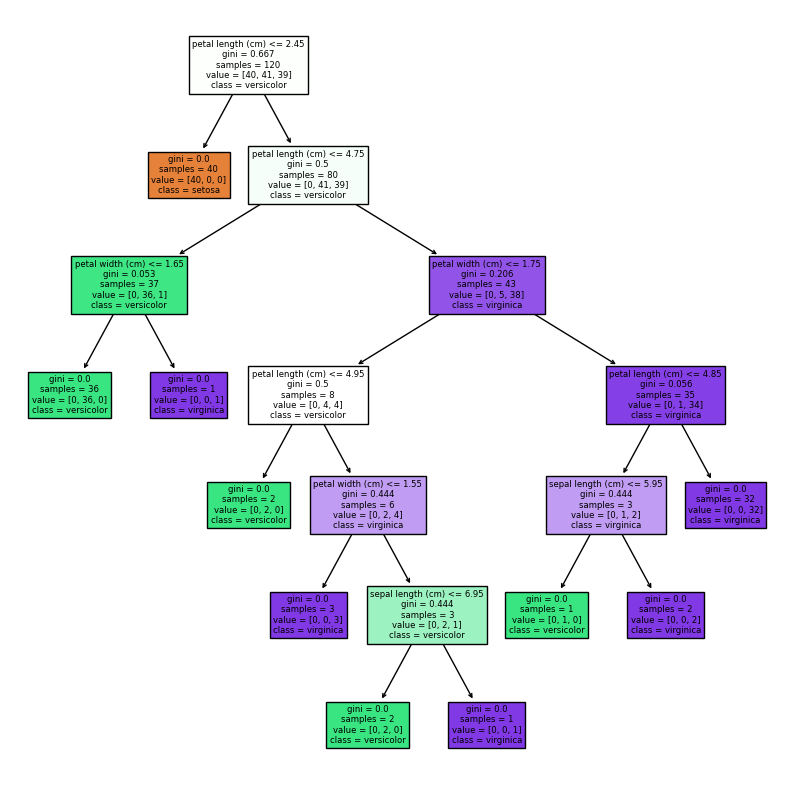

In [4]:
# 시각화
import matplotlib.pyplot as plt
from sklearn import tree

# 축생성
fig, ax = plt.subplots(figsize=(10,10))

# tree.plot_tree() function
tree.plot_tree(

      dt_clf      # model object    
    , ax=ax       # 축 지정
    , feature_names=iris_data.feature_names     # 컬럼명 지정
    , class_names=iris_data.target_names        # 답(label) 이름
    , filled=True
    
)

plt.show()

- gini : 지니계수
- samples : 현 규칙에 해당하는 데이터 건수
- value : 클래스 값 기반의 데이터 건수

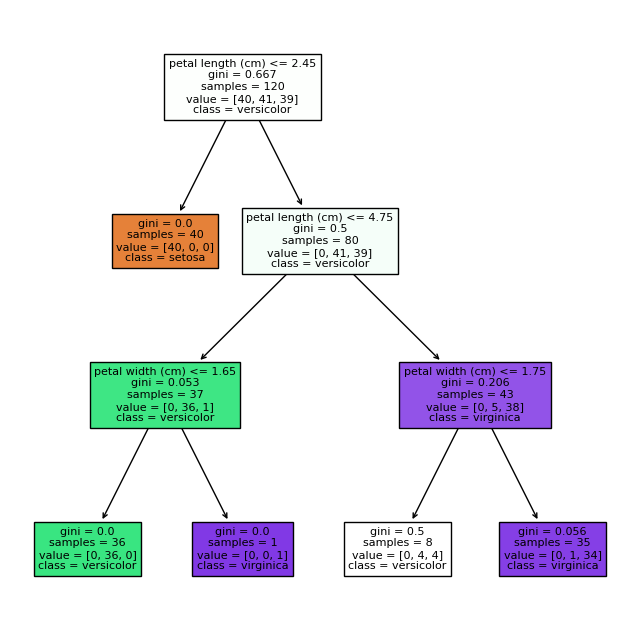

In [5]:
# max_depth = 3

dt_clf = DecisionTreeClassifier(max_depth=3, random_state=156)
dt_clf.fit(X_train, y_train)


# 축생성
fig, ax = plt.subplots(figsize=(8,8))

# tree.plot_tree() function
tree.plot_tree(

      dt_clf      # model object    
    , ax=ax       # 축 지정
    , feature_names=iris_data.feature_names     # 컬럼명 지정
    , class_names=iris_data.target_names        # 답(label) 이름
    , filled=True
    
)

plt.show()

In [6]:
# min_sample_split = 4

In [7]:
# min_sample_leaf = 4

#### feature_importances -> ndarray / 피처 순서대로 값 할당
: 피처가 트리분할 시 정보이득이나 지니계수를 얼마나 효율적으로 잘 개선시켰는지


-값이 높을 수록 해당 피처의 중요도가 높다

In [8]:
# feature importance 추출

print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_,3)))

# feature 별 importance 매핑

for name, value in zip(iris_data.feature_names
                       ,dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

Feature importances:
[0.    0.    0.935 0.065]
sepal length (cm) : 0.000
sepal width (cm) : 0.000
petal length (cm) : 0.935
petal width (cm) : 0.065


<Axes: >

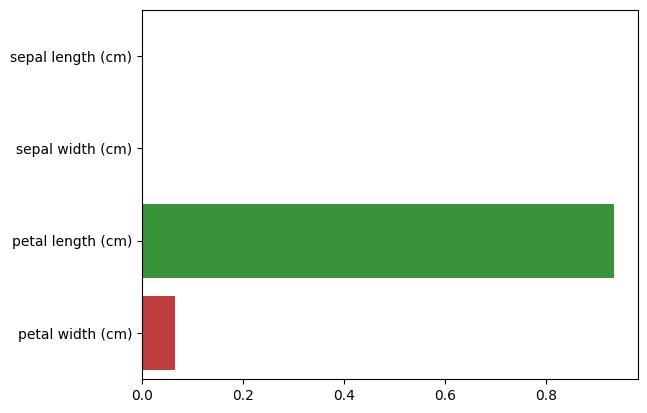

In [9]:
# feature importance를 column 별로 시각화 하기

sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

### O 결정 트리 과적합(Overfitting)

- 결정트리가 어떻게 학습 데이터를 분할해 예측을 수행하는지와 이로 인한 과적합 문제 시각화

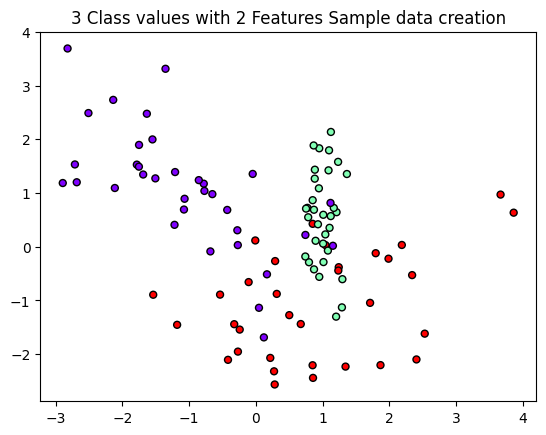

In [10]:
# make_classification() : 테스트용 데이터 만드는 함수 -> 피처 데이터 세트, 클래스 레이블 데이터 세트

from sklearn.datasets import make_classification

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 feature는 2개, 결정값 클래스는 3가지 유형의 classification 샘플 데이터 생성. 
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_classes=3, n_clusters_per_class=1,random_state=0)

# plot 형태로 2개의 feature로 2차원 좌표 시각화, 각 클래스값은 다른 색깔로 표시됨. 
plt.scatter(X_features[:, 0], X_features[:, 1]
            , marker='o', c=y_labels, s=25
            , cmap='rainbow', edgecolor='k')



In [11]:
# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=10)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200)
                         ,np.linspace(ylim_start,ylim_end, num=200)
                         )
    # ravel() : 1차원으로바꿈
    # np.c_ : concat
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)


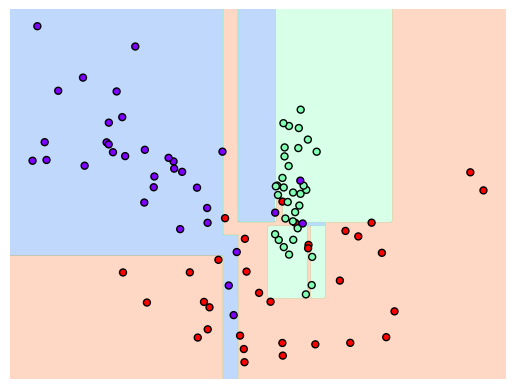

In [12]:
# 결정 경계 

# 특정한 트리생성 제약 없는 결정 트리의 학습과 결정 경계 시각화

dt_clf = DecisionTreeClassifier(random_state=156).fit(X_features, y_labels)

visualize_boundary(dt_clf, X_features, y_labels)

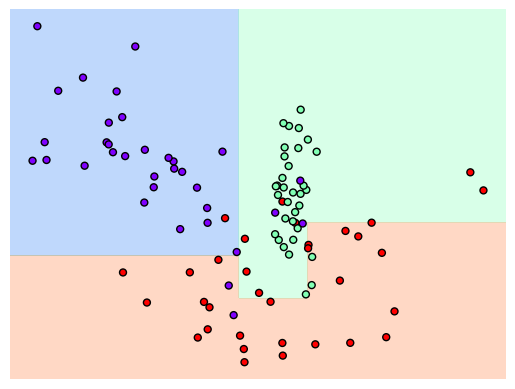

In [13]:
# 단순화 => 일반화

dt_clf = DecisionTreeClassifier(min_samples_leaf=6,random_state=156).fit(X_features, y_labels)

visualize_boundary(dt_clf, X_features, y_labels)

x:
 [[1 2 3]
 [1 2 3]
 [1 2 3]
 [1 2 3]] 

y:
 [[4 4 4]
 [5 5 5]
 [6 6 6]
 [7 7 7]]


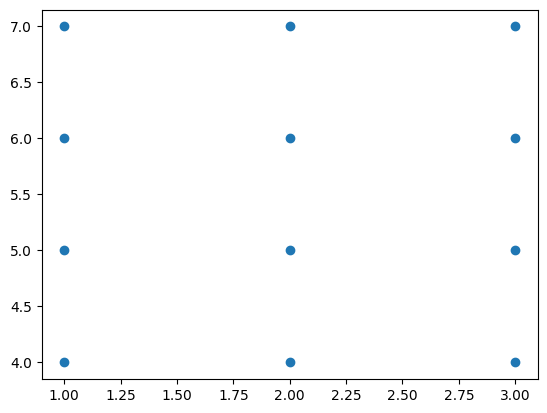

In [14]:
# meshgrid()

a = np.array([1,2,3])#np.linspace(1,5,50)
b = np.array([4,5,6,7])#np.linspace(51,55,50)
x,y = np.meshgrid(a,b)
print('x:\n', x, '\n')
print('y:\n', y)

plt.scatter(x,y)




#### ax.contourf()

: 등고선 채우기(contour fill) 플롯을 그리는 데 사용됩니다.

 ax.contourf() 함수는 2차원 그리드 데이터를 입력으로 받아 등고선을 생성하고, 등고선 영역을 채워서 컬러맵을 적용한 플롯을 그립니다.


- X, Y: 2차원 그리드 데이터를 나타내는 배열 또는 그리드 포인트를 생성하는 np.meshgrid()와 유사한 형태의 입력입니다.


- Z: X와 Y 좌표에 해당하는 함수 값 또는 그리드 데이터 배열입니다. 등고선을 그릴 때 기준이 되는 값으로 사용됩니다.


- levels: 등고선의 높이(값)를 지정하는 배열 또는 정수입니다. 정수로 지정하면 등고선의 수가 해당 값으로 설정됩니다.


- cmap: 등고선 영역을 채울 때 사용할 컬러맵을 지정합니다.


- alpha: 등고선 영역의 투명도를 지정하는 값입니다. 0에서 1 사이의 범위를 가지며, 0은 완전히 투명하고 1은 완전히 불투명함을 나타냅니다.


- extend: 컬러맵이 충분하지 않을 때 등고선 영역을 채우는 방식을 지정합니다. "neither" (기본값), "both", "min", "max" 중 하나를 선택할 수 있습니다.


- antialiased: 등고선의 안티앨리어싱 사용 여부를 지정하는 불리언 값입니다.


- vmin, vmax: 등고선 영역의 컬러맵을 지정하기 위한 값의 최솟값과 최댓값입니다.


- shading: 등고선 영역의 그림자 효과를 지정하는 값입니다. "flat" (기본값), "gouraud", "auto" 중 하나를 선택할 수 있습니다.




### O 결정 트리 실습 - 사용자 행동 인식 데이터 세트

- 사용자 행동 인식 데이터 세트에 대한 어떤 동작인지 예측 분류

- 561개의 피처 -> maX_features 사용

- 과한 피처 수는 과대적합을 일이킴 (딥러닝에서도 동일)


In [15]:
# 중복된 피처 확인


# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DataFrame으로 로드.
feature_name_df = pd.read_csv('../human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])


전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [16]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index'] > 1].count())
feature_dup_df[feature_dup_df['column_index'] > 1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [17]:
# 중복 해제
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                         if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df



In [18]:
# 학습/테스트 분할
def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('../human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('../human_activity/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('../human_activity/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('../human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('../human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test



In [19]:
X_train, X_test, y_train, y_test = get_human_dataset()


In [20]:
X_train.shape

(7352, 561)

In [21]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB


In [22]:
#  불균형 데이터셋 확인(레이블에서 확인 필요)
y_train.value_counts()

action
6         1407
5         1374
4         1286
1         1226
2         1073
3          986
Name: count, dtype: int64

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시 마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train , y_train)   # Model create
pred = dt_clf.predict(X_test)   # 예측
accuracy = accuracy_score(y_test , pred)    # 예측값, 원래답 비교 => 정확도
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

결정 트리 예측 정확도: 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


In [24]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [ 6, 8 ,10, 12, 16 ,20, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)


Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치:0.8513
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 16}


In [25]:
# GridSearchCV객체의 cv_results_ 속성을 DataFrame으로 생성. 
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트(Evaluation)셋, 학습 데이터 셋의 정확도 수치 추출
cv_results_df[['param_max_depth', 'mean_test_score']]


,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


In [26]:
max_depths = [ 6, 8 ,10, 12, 16 ,20, 24]
# max_depth 값을 변화 시키면서 그때마다 학습과 테스트 셋에서의 예측 성능 측정
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, min_samples_split=16, random_state=156)
    dt_clf.fit(X_train , y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test , pred)
    print('max_depth = {0} 정확도: {1:.4f}'.format(depth , accuracy))

max_depth = 6 정확도: 0.8551
max_depth = 8 정확도: 0.8717
max_depth = 10 정확도: 0.8599
max_depth = 12 정확도: 0.8571
max_depth = 16 정확도: 0.8599
max_depth = 20 정확도: 0.8565
max_depth = 24 정확도: 0.8565


In [27]:

params = {
    'max_depth' : [ 8 , 12, 16 ,20], 
    'min_samples_split' : [16, 24],
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [28]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))


결정 트리 예측 정확도:0.8717


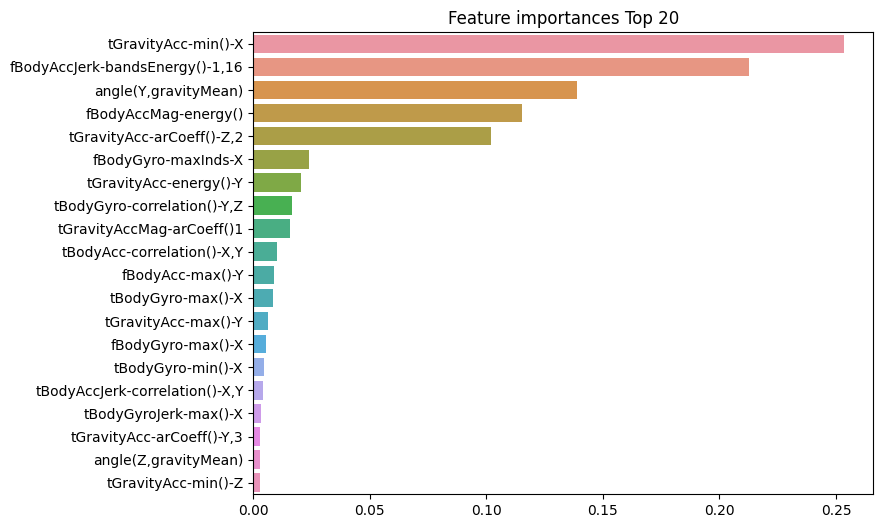

In [29]:
# 피처 중요도 추출

import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns  )
# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()


In [30]:
ftr_top20.index

Index(['tGravityAcc-min()-X', 'fBodyAccJerk-bandsEnergy()-1,16',
       'angle(Y,gravityMean)', 'fBodyAccMag-energy()',
       'tGravityAcc-arCoeff()-Z,2', 'fBodyGyro-maxInds-X',
       'tGravityAcc-energy()-Y', 'tBodyGyro-correlation()-Y,Z',
       'tGravityAccMag-arCoeff()1', 'tBodyAcc-correlation()-X,Y',
       'fBodyAcc-max()-Y', 'tBodyGyro-max()-X', 'tGravityAcc-max()-Y',
       'fBodyGyro-max()-X', 'tBodyGyro-min()-X',
       'tBodyAccJerk-correlation()-X,Y', 'tBodyGyroJerk-max()-X',
       'tGravityAcc-arCoeff()-Y,3', 'angle(Z,gravityMean)',
       'tGravityAcc-min()-Z'],
      dtype='object')

---

# **20230523**

## 03 앙상블 학습 (Ensemble Learning)

: 앙상블 학습을 통한 분류는 여러개의 분류기를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법 (=집단지성)

ex) 랜덤 포레스트, 그래디언트 부스팅(**XGboost, LightGBM**)


### O 앙상블 학습 개요
=> 보팅(Voting) | **배깅(Bagging)** | **부스팅(Boosting)**<br>
(배깅 내에 보팅이 포함됨)

- 보팅\배깅 : 여러개의ㅣ 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식

- 보팅 : 서로 다른 알고리즘을 가진 분류기를 결합한 것


<br>

- **배깅** : 각각의 분류기가 모두 같은 유형의 알고리즘 기반, 데이터 샘플링이 다름 => 보팅 수행
        <br> ex) 랜덤 포레스트

- 개별 분류기에게 데이터를 샘플링해서 추출하는방식 = **부트 스트래핑** 분할방식

- 배깅 앙상블에서의 데이터 샘플링은 복원추출 방식(중복 허용)


<br>

- **부스팅** :  여러개의 분류기가 순차적으로 학습 수행,<br> 앞서 학습한 분류기가 ***예측이 틀린 데이터에 대해***서 다음 분류기에는 **가중치** 부여하며 학습 진행
        <br> ex) 그래디언트 부스팅, XGboost, LightGBM

### O 보팅 유형- 하드 | 소프트


- 하드 보팅 : 다수결 원칙, 예측한 결괏값들 중 다수의 분류기가 결정한 예측값을 최종 보팅 결괏값으로 선정

- 소프트 보팅 : 확률의 평균, 분류기들의 레이블 값 결정 확률을 모두 더하고 이를 평균해서 이들 중 확률이 가장 높은 레이블 값을 최종 보팅 결과값으로 선정 -> 확률 return

### O 보팅 분류기(Voting Classifier)

- ML모델의 성능은 이렇게 다양한 테스트 데이터(new data)에 의해 검증(평가)되므로 어떻게 높은 유연성을 가지고 현실에 대처할 수 있는 가가 중요한 ML모델의 평가 요소가 된다. 
<br>~ 편향-분산 트레이드 오프는 ML모델이 극복해야 할 중요 과제



In [31]:
from sklearn.datasets import load_breast_cancer

## 04 랜덤포레스트


: 배깅의 대표 알고리즘

### O 랜덤포레스트의 개요 및 실습

- 배깅(Bagging) : 같은 알고리즘으로 여러 개의 분류기를 만들어서 보팅으로 최종 결정하는 알고리즘

- 랜덤 포레스트는 여러개의 데이터 세트가 중첩되게 분리된 부트스트래핑 분할 방식으로 이루어짐

- Bagging = bootstrap aggregating

In [32]:

def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                         if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [34]:
import pandas as pd

def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('../human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('../human_activity/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('../human_activity/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('../human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('../human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset()



In [36]:
# Human Activity dataset

X_train, X_test, y_train, y_test = get_human_dataset()

X_train.shape, X_test.shape

((7352, 561), (2947, 561))

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_human_dataset( )을 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 셋으로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))


랜덤 포레스트 정확도: 0.9253


### O 랜덤포레스트 하이퍼 파라미터 및 튜닝



In [40]:

from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth' : [6, 8, 10, 12], 
    'min_samples_leaf' : [8, 12, 18 ],
    'min_samples_split' : [8, 16, 20]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2, n_jobs=-1 )
grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))


최적 하이퍼 파라미터:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9180


In [39]:
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8, \
                                 min_samples_split=8, random_state=0)
rf_clf1.fit(X_train , y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))


예측 정확도: 0.9165


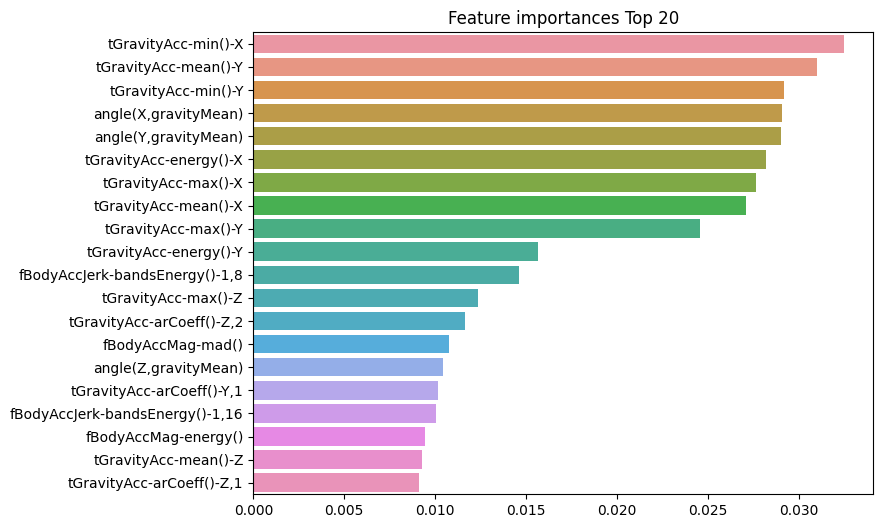

<Figure size 640x480 with 0 Axes>

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('rf_feature_importances_top20.tif', format='tif', dpi=300, bbox_inches='tight')


## 05 GBM (Gradient Boosting Machine)

### O GBM의 개요 및 실습

: 부스팅 알고리즘은 여러개의 *약한 학습기*를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치를 부여를 통해 *오류를 개선*해 나가면서 학습

#### ㅇ 에이다 부스트(AdaBoost)

- AdaBoost -> GBM -> XGBoost -> LigthGBM 순으로 개발됨

- 1. 학습 -> 2. 오류데이터에 대한 가중치 부여 -> 3. 학습 -> 4. 오류 데이터에 대한 가중치 부여 -> ... => 학습기 결과 모두 결합하여 예측 수행

#### ㅇ GBM

: 에디다 부스트와 유사하나 가중치 업데이트를 경사 하강법(Gradient Descent)를 이용

- 경사하강법 :

$$w_i \approx w_{i-1} - a \times 기울기$$

                            ** a(alpha) = 학습률

In [43]:

from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train , y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print("GBM 수행 시간: {0:.1f} 초 ".format(time.time() - start_time))


GBM 정확도: 0.9389
GBM 수행 시간: 1107.9 초 


In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100, 500],
    'learning_rate' : [ 0.05, 0.1]
}
grid_cv = GridSearchCV(gb_clf , param_grid=params , cv=2 ,verbose=1)
grid_cv.fit(X_train , y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))


### O GBM 하이퍼 파라미터 소개


: GBM = 트리 계열 앙상블 모델 ~ n_estimators, max_depth, max_feautures 등 포함

### O XGBoost 개요

일반화 성능(과적합 규제) GBM보다 좋음

교차검증 자체 내장

결손값 자체 처리

제어가 까다로움 => 튜닝이 어려움


### O 파이썬 래퍼 XGBoost 하이퍼 파라미터 => 'cho4_XGBoost.ipynb'

### O 파이썬 래퍼 XGBoost 적용 - 위스콘신 유방암 예측 

### O 사이킷런 래퍼 XGBoost의 개요 및 적용

fit, predict, GridSCV 가능

## 07 LightGBM

- 비균형 트리

<br>

- 빠른 속도
- 더 작은 메모리 사용량
- 카테고리형 피처의 자동 변환과 최적 분할(원-핫인코딩 등 필요x)


### O LightGBM 하이퍼 파라미터

### O 하이퍼 파라미터 튜닝 방안

### O 파이썬 래퍼 LightGBM과 사이킷런 래퍼 XGBoost, LightGBM 파라미터 비교

### O LightGBM 적용 - 위스콘신 유방암 예측

---

# **20230525**

## 08 베이지안 최적화 기반의 HyperOpt를 이용한 하이퍼 파라미터 튜닝

- 베이즈(안) 확률 : 사전의 상태에 의하여 **사후의 확률** 판단 => 확률의 개념을 '불확실성' 척도로 해석

-> 아이디어 : 새로운 정보가 들어왔을 때 이전의 불확실성(신뢰도) 업데이트(수정)

-> *기존 확률에 대한 신뢰도(사전확률)* 가 *새로운 데이터에 의해 어떻게 변화하는지(사후확률)* 측정

<br>


+) 조건부확률 : 사건 B가 발생했을 때 A가 발생할 확률

$$ P(A|B) = \frac{P(A \cap B)}{P(B)} $$




- 베이즈 정리

$$ P(A|B) = \frac{P(B|A) \times P(A)}{P(B)} $$

  <br>

- $P(B|A)$ : A가 주어진 상황에서 B가 발생할 확률 => **우도**
- $P(A|B)$ : 사건 B가 발생했을 때 A가 발생할 확률 => **사후 확률**   
- $P(A)$ : A가 발생할 확률 => **사전 확률**   
- $P(B)$ : B가 발생할 확률 => **증거**    

* 우도(likelihood)

: 신뢰도 하락 => 우도 하락

=> 우도는 신뢰도의 측정값

예시1) 
D 질병 예측 장치의 정확도 99%(?)

- 질병이 있는 사람이 테스트 했을 때 양성진단 99%
- 질병 없는 살람 테스트 했을 때 음성진단 99%
- 전체 인구 랜덤 샘플링 테스트 했을 때 양성진단 1%

Q) 특정 사람이 테스트 결과 양성받음(=>B), 진짜 양성일 확률(=>A)은?

$$ P(A|B) = \frac{P(B|A) \times P(A)}{P(B)}  = \frac{0.99 \times 0.01}{0.99 \times 0.01 + 0.99 \times 0.01} $$

In [1]:
(0.99 * 0.01) / (0.99 * 0.01 + 0.99 * 0.01)

0.5

예시2)
코로나 진단키트 정확도(민감도, 특이도)

- 민감도 : 감염된 사람을 양성으로 진단(TT)
- 특이도 : 감염 되지 않은 사람을 음성으로 진단(FF)

Q) 민감도 95%, 특이도 98% 인 진단 키트로 테스트한 사람들 가운데 실제로 감염된 사람의 비율 2% ,
테스트 결과 양성인(=>B) 사람이 실제로 감염되었을(=>A) 확률은?

<br>

$$ P(A|B) = \frac{P(B|A) \times P(A)}{P(B)} = \frac{민감도 \times 실제 감염된 확률 2\% }{민감도 \times 2\% + 특이도 \times 2\%} = \frac{0.95*0.02}{0.95*0.02 + 0.98 * 0.02}$$

In [4]:
(0.95*0.02)/(0.95*0.02+0.98*0.02)

 #=> 테스트기 정확도 49.2%

0.4922279792746114

### O 베이지안 최적화 개요

- 베이지안 최적화는 함수(알고리즘)식을 *알 수 없는* 블랙 박스 형태의 함수에서 최대 또는 최소 함수 반환 값을 만드는 최적 입력값을 *가능한 적은 시도*를 통해 빠르고 효과적으로 찾아주는 방식

- 최적 입력값 =  하이퍼 파라미터 값

- 베이지안 확률에 기반을 두고 있는 최적화 기법 <br> => 새로운 데이터를 입력 받았을 때 최적 **함수를 예측**하는 사후 모델을 개선해 나가면서 최적 함수 모델을 만듬


- 베이지안 최적화 구성 요소 :<br> ***대체모델(Surrogate Model) | 획득 함수(Acquisition Function)***

- 대체모들은 획득함수로부터 최적 함수를 예측할 수 있는 입력값을 추천 받은 뒤 이를 기반으로 최적 함수 모델을 개선해 나가며, <br>
획득 함수는 개선된 대체 모델을 기반으로 최적 입력값을 계산함

(= 강화학습)


- 베이지안 최적화 구성 단계

1. 랜덤하게 하이퍼 파라미터들을 샘플링하고 성능 결과 관측

2. 관측된 값을 기반으로 대체 모델은 최적함수 추정 <brP> (신뢰구간 : 추정된 함수의 결과값 오류편차 = 추정함수의 불확실성) <br>(최적 관측값 = y축 value에서 가장 높은 값을 가질때의 하이퍼 파리미터)

3. 추정된 최적함수를 기반으로 **획득 함수**는 다음으로 관측할 하이퍼 파라미터 값을 계산. 획득 함수는 이전의 최적 관측값보다 더 큰 최댓값을 가질 가능성이 높은 지점을 찾아 다음 관측할 하이퍼 파라미터를 **대체 모델**에 전달

4. 획득 함수로부터 전달된 하이퍼 파라미터를 수행하여 관측된 값을 기반으로 대체모델은 갱신되어 다시 최적함수 예측 추정



-> 3,4 반복 => 불확실성 개선 => 보다 정확한 최적 함수 추정 가능

### O HyperOPt 사용하기

: 베이지안 최적화를 머신러닝 모델의 하이퍼 파라미터 튜닝에 적용할 수 있게 제공되는 파이썬 패키지


- 주요 로직

1. 입력 변수명과 입력값의 검색 공안(search space) 설정

2. 목적함수(object fumction)의 설정

3. 목적함수의 반환 최솟값을 가지는 **최적 입력값**을 유추

In [5]:
# !pip install hyperopt

     ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
     ------------------------------- -------- 1.2/1.6 MB 39.6 MB/s eta 0:00:01
     ---------------------------------------- 1.6/1.6 MB 33.5 MB/s eta 0:00:00
  Using cached tqdm-4.65.0-py3-none-any.whl (77 kB)
     ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
     ---------------------------- ----------- 1.5/2.1 MB 30.7 MB/s eta 0:00:01
     ---------------------------------------- 2.1/2.1 MB 26.4 MB/s eta 0:00:00
     ---------------------------------------- 0.0/200.5 kB ? eta -:--:--
     ------------------------------------- 200.5/200.5 kB 12.7 MB/s eta 0:00:00
     ---------------------------------------- 0.0/840.9 kB ? eta -:--:--
     ------------------------------------- 840.9/840.9 kB 26.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for future: filename=future-0.18.3-py3-none-any.whl size=492055 sh

In [6]:
import hyperopt

print(hyperopt.__version__)

0.2.7


#### 최적화 예제


In [ ]:
from hyperopt import hp

In [ ]:
# search space 생성

# -10 ~ 10까지 1간격을 가지는 입력 변수 x와 -15 ~ 15까지 1간격으로 입력 변수 y 설정.
search_space = {'x': hp.quniform('x', -10, 10, 1), 'y': hp.quniform('y', -15, 15, 1) }

# hp.quniform(label, low, high, q) : label 로 지정된 입력값 변수 검색 공간을 최솟값 low 부터 최댓값 high 까지의 q 간격을 가지고 설정
# hp.uniform(label, low, high)
# hp.randint(label, upper)
# hp.loguniform(label,low, high)
# hp.choice(lable, option): option:'gini' or 'entropy'

In [8]:
from hyperopt import STATUS_OK

# 목적 함수를 생성. 변숫값과 변수 검색 공간을 가지는 딕셔너리를 인자로 받고, 특정 값을 반환
def objective_func(search_space):
    x = search_space['x']
    y = search_space['y']
    retval = x**2 - 20*y
    
    return retval

->
$ 목적함수 = x^2 - 20y$

In [28]:
from hyperopt import fmin, tpe, Trials
import numpy as np

# 입력 결괏값을 저장한 Trials 객체값 생성.
trial_val = Trials()

# 목적 함수의 최솟값을 반환하는 최적 입력 변숫값을 5번의 입력값 시도(max_evals=5)로 찾아냄.
best_01 = fmin(fn=objective_func
               , space=search_space
               , algo=tpe.suggest
               , max_evals=138   # 반복(시도) 회수
               , trials=trial_val
               , rstate=np.random.default_rng(seed=0))
print('best:', best_01)


100%|██████████| 138/138 [00:01<00:00, 115.20trial/s, best loss: -300.0]
best: {'x': -0.0, 'y': 15.0}


### O HyperOpt 를 이용한 XGBoost 하이퍼 파라미터 최적화

In [30]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


dataset = load_breast_cancer() #유방암 데이터 로드


cancer_df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
cancer_df['target']= dataset.target
X_features = cancer_df.iloc[:, :-1]
y_label = cancer_df.iloc[:, -1]
X_features.shape, y_label.shape

((569, 30), (569,))

In [31]:
# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test=train_test_split(X_features, y_label, test_size=0.2, random_state=156 )

# 앞에서 추출한 학습 데이터를 다시 학습과 검증 데이터로 분리
X_tr, X_val, y_tr, y_val= train_test_split(X_train, y_train, test_size=0.1, random_state=156 )

In [34]:
from hyperopt import hp

# max_depth는 5에서 20까지 1간격으로, min_child_weight는 1에서 2까지 1간격으로
# colsample_bytree는 0.5에서 1사이, learning_rate는 0.01에서 0.2 사이 정규 분포된 값으로 검색.
xgb_search_space = {'max_depth': hp.quniform('max_depth', 5, 20, 1), 
                    'min_child_weight': hp.quniform('min_child_weight', 1, 2, 1),
                    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
                    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
}

In [35]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from hyperopt import STATUS_OK

# fmin()에서 입력된 search_space 값으로 입력된 모든 값은 실수형임.
# XGBClassifier의 정수형 하이퍼 파라미터는 정수형 변환을 해줘야 함.
# 정확도는 높을수록 더 좋은 수치임. -1 * 정확도를 곱해서 큰 정확도 값일수록 최소가 되도록 변환
def objective_func(search_space):
    # 수행 시간 절약을 위해 nestimators는 100으로 축소
    xgb_clf = XGBClassifier(n_estimators=100, max_depth=int(search_space['max_depth']),
                            min_child_weight=int(search_space['min_child_weight']),
                            learning_rate=search_space['learning_rate'],
                            colsample_bytree=search_space['colsample_bytree'],
                            eval_metric='logloss')
    accuracy = cross_val_score(xgb_clf, X_train, y_train, scoring='accuracy', cv=3)
    
    # accuracy는 cv=3 개수만큼 roc-auc 결과를 리스트로 가짐. 이를 평균해서 반환하되 -1을 곱함.
    return {'loss':-1 * np.mean(accuracy), 'status': STATUS_OK}


In [36]:
from hyperopt import fmin, tpe, Trials

trial_val = Trials()
best = fmin(fn=objective_func,
            space=xgb_search_space,
            algo=tpe.suggest,
            max_evals=50, # 최대 반복 횟수를 지정합니다.
            trials=trial_val, rstate=np.random.default_rng(seed=9))
print('best:', best)


100%|██████████| 50/50 [00:11<00:00,  4.23trial/s, best loss: -0.9670616939700244]
best: {'colsample_bytree': 0.5424149213362504, 'learning_rate': 0.12601372924444681, 'max_depth': 17.0, 'min_child_weight': 2.0}


In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))



In [38]:
xgb_wrapper = XGBClassifier(n_estimators=400,
                            learning_rate=round(best['learning_rate'], 5),
                            max_depth=int(best['max_depth']),
                            min_child_weight=int(best['min_child_weight']),
                            colsample_bytree=round(best['colsample_bytree'], 5)
                           )

evals = [(X_tr, y_tr), (X_val, y_val)]
xgb_wrapper.fit(X_tr, y_tr, early_stopping_rounds=50, eval_metric='logloss',
                eval_set=evals, verbose=True)

preds = xgb_wrapper.predict(X_test)
pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, preds, pred_proba)


[0]	validation_0-logloss:0.58942	validation_1-logloss:0.62048
[1]	validation_0-logloss:0.50801	validation_1-logloss:0.55913
[2]	validation_0-logloss:0.44160	validation_1-logloss:0.50928
[3]	validation_0-logloss:0.38734	validation_1-logloss:0.46815
[4]	validation_0-logloss:0.34224	validation_1-logloss:0.43913
[5]	validation_0-logloss:0.30425	validation_1-logloss:0.41570
[6]	validation_0-logloss:0.27178	validation_1-logloss:0.38953
[7]	validation_0-logloss:0.24503	validation_1-logloss:0.37317
[8]	validation_0-logloss:0.22050	validation_1-logloss:0.35628
[9]	validation_0-logloss:0.19873	validation_1-logloss:0.33798
[10]	validation_0-logloss:0.17945	validation_1-logloss:0.32463
[11]	validation_0-logloss:0.16354	validation_1-logloss:0.31384
[12]	validation_0-logloss:0.15032	validation_1-logloss:0.30607
[13]	validation_0-logloss:0.13813	validation_1-logloss:0.30143
[14]	validation_0-logloss:0.12798	validation_1-logloss:0.29513
[15]	validation_0-logloss:0.11926	validation_1-logloss:0.28891
[1

## 09 분류 실습 - 캐글 산탄데르 고객 만족 예측

### O 데이터 전처리

### O XGBoost 모델 학습과 하이퍼 파라미터 튜닝

### O LightGBM 모델 학습과 하이퍼 파라미터 튜닝

---

# **20230526**

## 10 분류 실습 - 캐글 신용카드 사기 검출

: 불균형 데이터

### O 언더 샘플링과 오버 샘플링의 이해

### O 데이터 일차 가공 및 모델 학습/예측/평가

### O 데이터 분포도 변환 후 모델 학습/예측/평가

### O 이상치 데이터 제거 후 모델 학습/예측/평가

### O SMOTE 오버 샘플링 적용 후 모델 학습/예측/평가

## 11 스태킹 앙상블